In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow import keras
import os
from sklearn.model_selection import train_test_split


In [2]:
data = []
labels = []
classes = 43
cur_path = 'C:/Sem-4/ML/Traffic_signs_classifier'

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [3]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [4]:
y_train = keras.utils.to_categorical(y_train, 43)
y_test = keras.utils.to_categorical(y_test, 43)

In [5]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]),
tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
tf.keras.layers.Dropout(rate=0.25),
tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
tf.keras.layers.Dropout(rate=0.25),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dropout(rate=0.5),
tf.keras.layers.Dense(43, activation='softmax')])


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
981/981 [==============================] - 81s 83ms/step - loss: 2.0075 - accuracy: 0.4657 - val_loss: 0.6990 - val_accuracy: 0.8267
Epoch 2/10
981/981 [==============================] - 84s 86ms/step - loss: 0.9151 - accuracy: 0.7292 - val_loss: 0.4350 - val_accuracy: 0.8666
Epoch 3/10
981/981 [==============================] - 76s 78ms/step - loss: 0.6314 - accuracy: 0.8114 - val_loss: 0.2785 - val_accuracy: 0.9206
Epoch 4/10
981/981 [==============================] - 79s 81ms/step - loss: 0.5105 - accuracy: 0.8467 - val_loss: 0.1960 - val_accuracy: 0.9374
Epoch 5/10
981/981 [==============================] - 77s 79ms/step - loss: 0.4104 - accuracy: 0.8780 - val_loss: 0.1189 - val_accuracy: 0.9681
Epoch 6/10
981/981 [==============================] - 77s 78ms/step - loss: 0.3487 - accuracy: 0.8955 - val_loss: 0.1077 - val_accuracy: 0.9677
Epoch 7/10
981/981 [==============================] - 76s 78ms/step - loss: 0.3082 - accuracy: 0.9083 - val_loss: 0.0865 - val_accuracy:

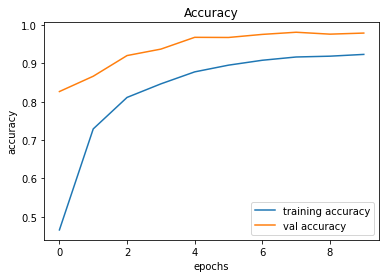

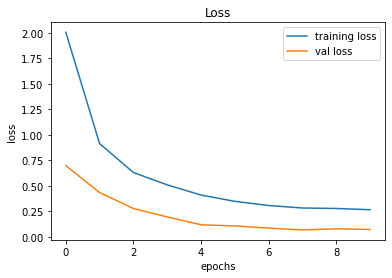

In [7]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('C:/Sem-4/ML/Traffic_signs_classifier/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]
p='C:/Sem-4/ML/Traffic_signs_classifier/'
for img in imgs:
    img=os.path.join(p,img)
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.932541567695962
